In [ ]:
!pip install scikit-learn==1.3.0
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 84.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 95.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [ ]:
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

Construct a fully connected neural network model for classifying the CIFAR-10
dataset. Use a 70%-30% split for training and validation data.
(a) (10 pts.) Visualize the data by plotting an image from each category from the CIFAR-10 dataset.


In [ ]:
(x_train_temp, y_train_temp), (x_test_temp, y_test_temp) = cifar10.load_data()

X = np.concatenate((x_train_temp, x_test_temp))
y = np.concatenate((y_train_temp, y_test_temp))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("x_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train shape: (42000, 32, 32, 3)
y_train shape: (42000, 1)
x_test shape: (18000, 32, 32, 3)
y_test shape: (18000, 1)


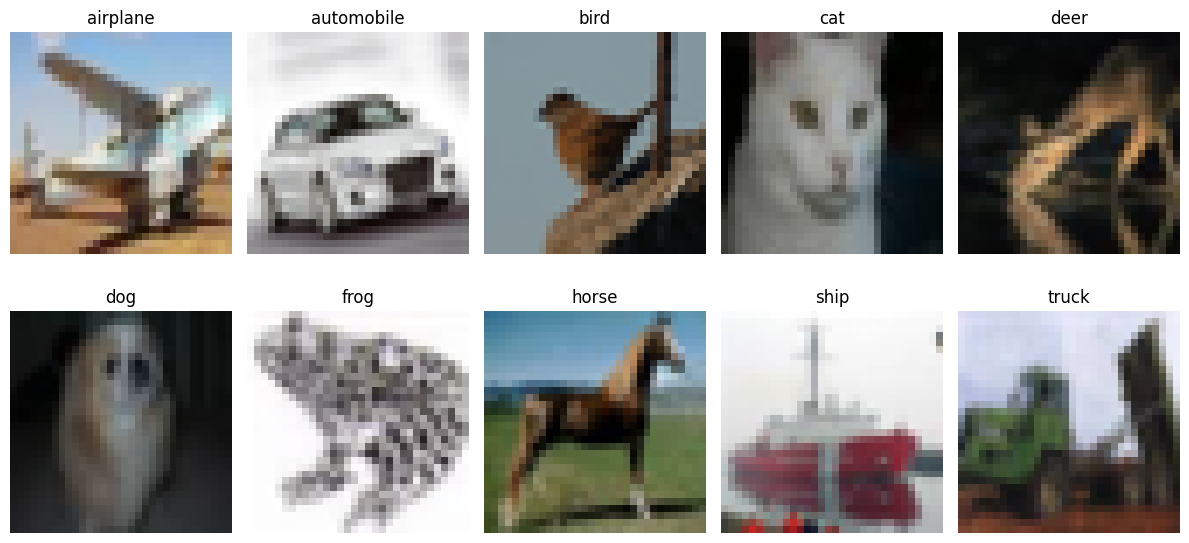

In [ ]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Loop to display one image from each class
for count in range(10):
    for i in range(len(X_train)):
        if y_train[i] == count:
            axes[count // 5, count % 5].imshow(X_train[i])
            axes[count // 5, count % 5].set_title(label_names[count])
            axes[count // 5, count % 5].axis('off')
            break

plt.tight_layout()
plt.show()

(b) (30 pts.) Demonstrate the tuning of the hyperparameters of the neural network via grid-search

In [ ]:
def create_model(optimizer='adam', dropout_rate=0.3, hidden_units=64):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),  # Flatten the input image
        Dense(hidden_units, activation='relu'),  # First dense layer
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),  # Second dense layer
        Dropout(dropout_rate),
        Dense(10, activation='softmax')  # Output layer
    ])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

X_train_flat = X_train.reshape(X_train.shape[0], -1)
y_train_cat = to_categorical(y_train, num_classes=10)
X_train_scaled = X_train.astype("float32") / 255.0
X_test_scaled = X_test.astype("float32") / 255.0


model = KerasClassifier(model=create_model, verbose=0)

param_grid = {
    'model__optimizer': ['adam'],  # Try only one optimizer first
    'model__dropout_rate': [0.3],  # Use a single dropout value
    'batch_size': [32,64],  # Use a smaller batch size
    'epochs': [5]  # Use only 3 epochs for faster experimentation
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train_cat)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best: 0.35609523809523813 using {'batch_size': 64, 'epochs': 5, 'model__dropout_rate': 0.3, 'model__optimizer': 'adam'}


Of course more parameters can be used in the grid search to better optimize the model, but with a dataset this large, it takes too long.

(c) (5 pts.) Calculate and plot the training and validation losses of the tuned network.

(d) (5 pts.) Calculate and plot the training and validation accuracies of the tuned
network.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2364 - loss: 2.1206 - val_accuracy: 0.2991 - val_loss: 1.8940
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3111 - loss: 1.9052 - val_accuracy: 0.3369 - val_loss: 1.8216
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3336 - loss: 1.8447 - val_accuracy: 0.3559 - val_loss: 1.7875
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3390 - loss: 1.8421 - val_accuracy: 0.3623 - val_loss: 1.7558
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3422 - loss: 1.8225 - val_accuracy: 0.3475 - val_loss: 1.7844


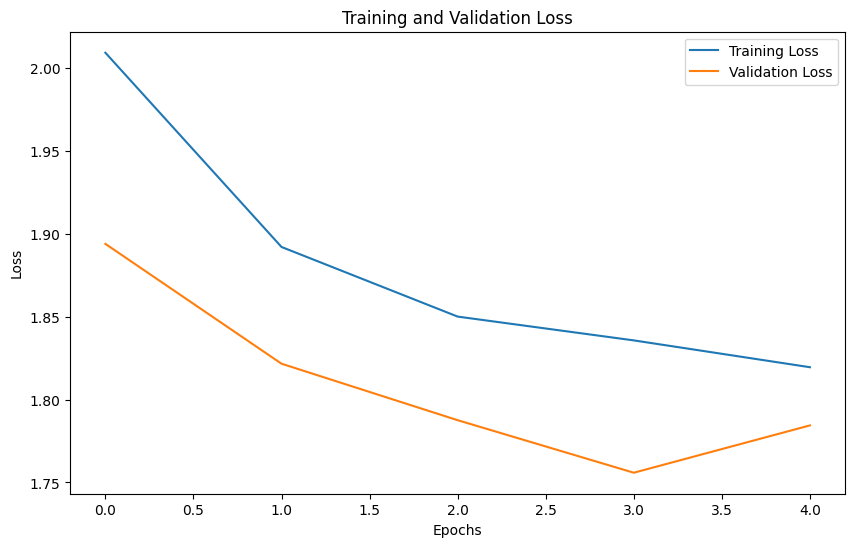

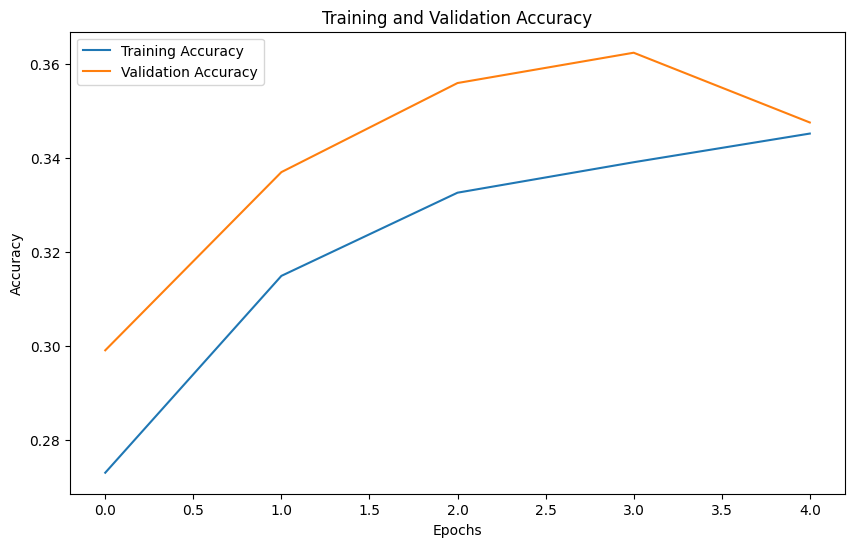

In [ ]:
y_test_cat = to_categorical(y_test, num_classes=10)
best_params = grid_result.best_params_
best_model = create_model(
    optimizer=best_params['model__optimizer'],
    dropout_rate=best_params['model__dropout_rate'],
    hidden_units=best_params.get('model__hidden_units', 64)  # Use 64 by default if not specified
)

# Fit the model with the best parameters on the training data
history = best_model.fit(
    X_train_scaled, y_train_cat,
    validation_data=(X_test_scaled, y_test_cat),
    epochs=best_params['epochs'],  # Use the best epochs found in GridSearchCV
    batch_size=best_params['batch_size'],  # Use the best batch size found in GridSearchCV
    verbose=1
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2) Obtain the NASA airfoil self-noise dataset from UCI machine learning dataset repository.
The dataset describes different size NACA 0012 airfoils at various wind tunnel speeds
and angles of attack. The span of the airfoil and the observer position were the same in
all of the experiments. The following attributes were measured:

i. Frequency, in Hz.

ii. Angle of attack, in degrees.

iii. Chord length, in meters.

iv. Free-stream velocity, in meters per second.

v. Suction side displacement thickness, in meters.

The only measured output was:

i. Scaled sound pressure level, in decibels.

(a) (10 pts.) Visualize the dataset.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


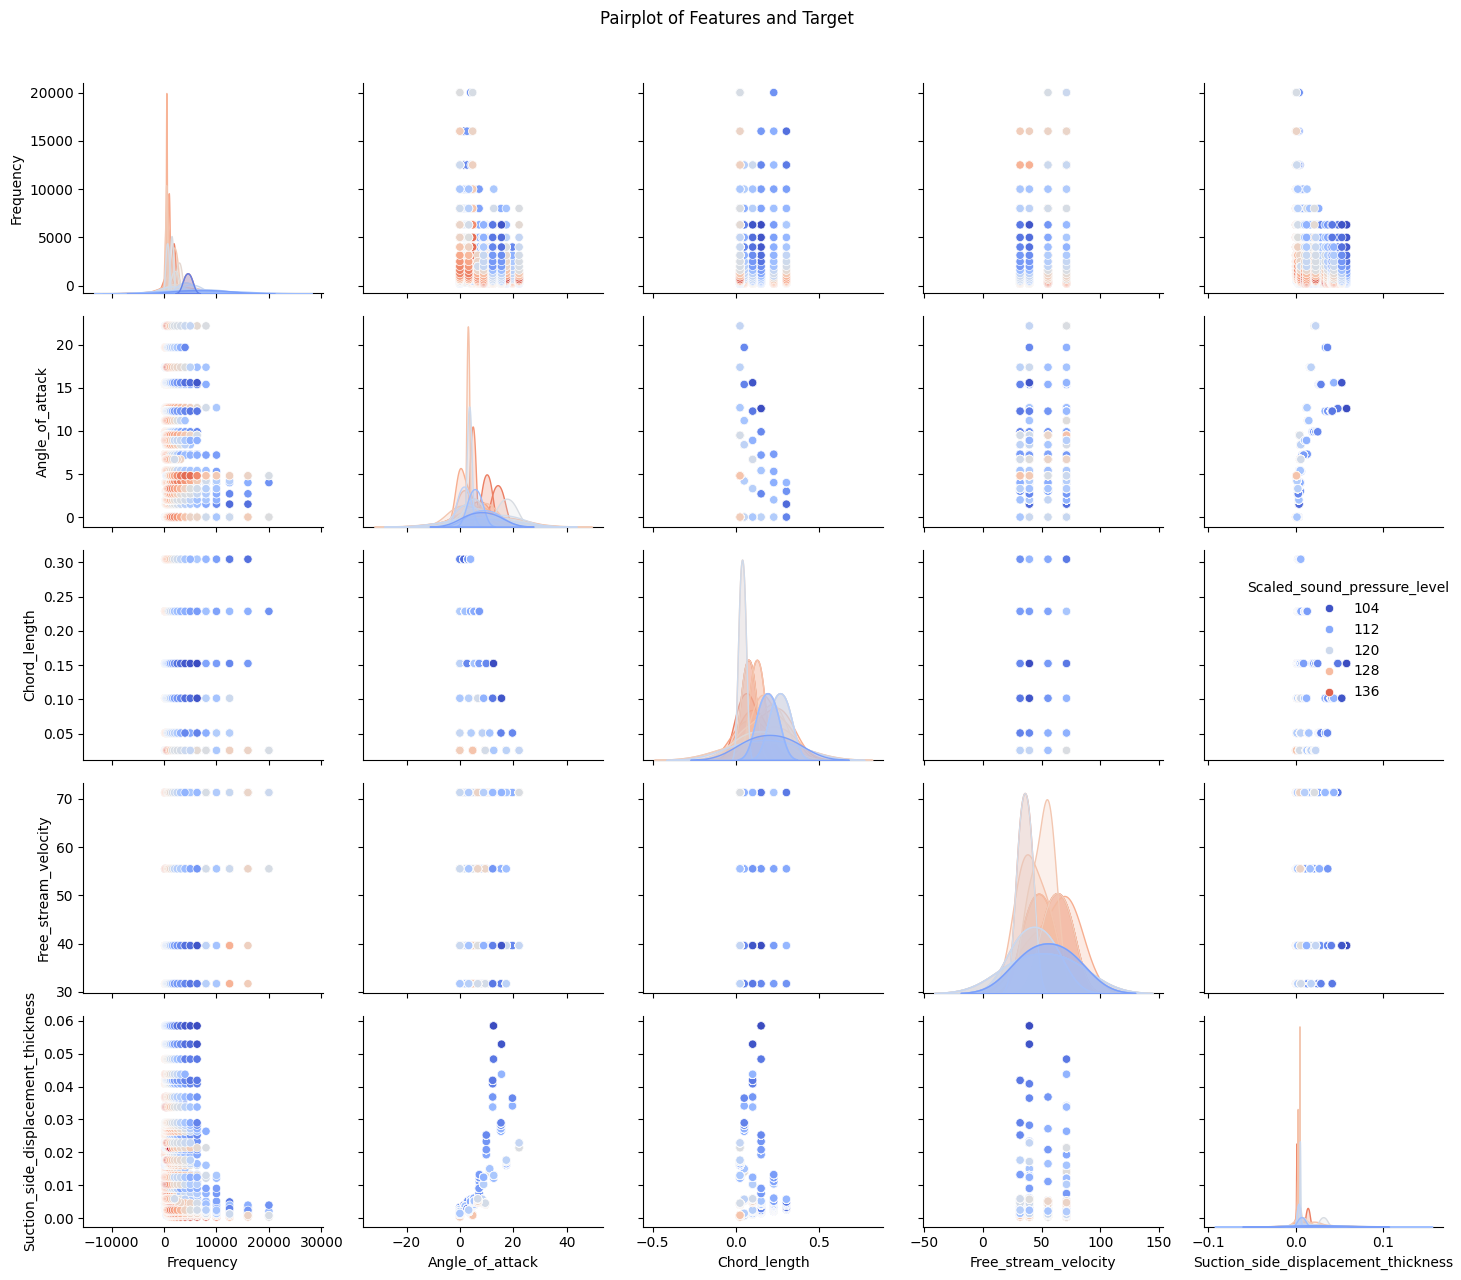

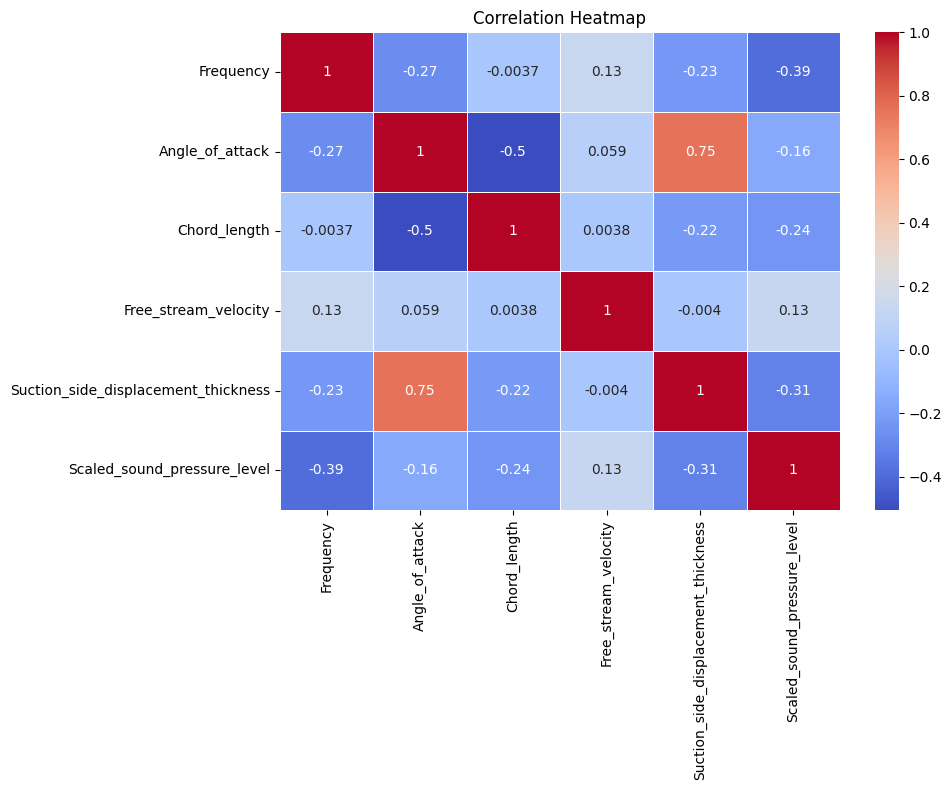

In [22]:
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ML/airfoil_self_noise.dat'
columns = ['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Scaled_sound_pressure_level']
target = 'Scaled_sound_pressure_level'
data = pd.read_csv(file_path, delimiter='\t', header=None, names=columns)

sns.pairplot(data, hue=target, palette="coolwarm")
plt.suptitle("Pairplot of Features and Target", y=1.02)

plt.tight_layout()
plt.show()

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

The pairplots show possible correlations between different attributes of the data. The heatmap does essentially the same thing, but it's easier to point out the correlations. From the data, it can be seen that suction side displacement thickness and angle of attack have a strong correlation.

(b) (30 pts.) Construct a fully connected neural network model for estimating
scaled sound pressure level, in decibels, from the attributes by choosing a 70%-30%
split.

(c) (10 pts.) Calculate the coefficient of determination.

In [ ]:
X = data.drop('Scaled_sound_pressure_level', axis=1)
y = data['Scaled_sound_pressure_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

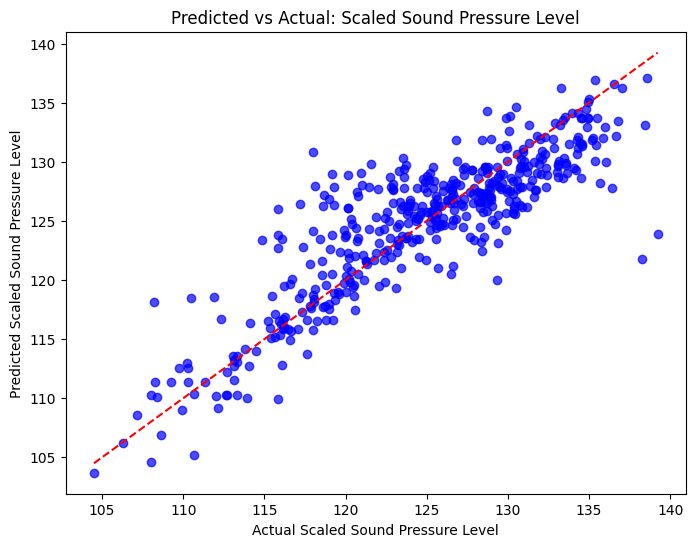

Mean Squared Error: 11.936688157461097
R-squared: 0.747171621058783


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual: Scaled Sound Pressure Level')
plt.xlabel('Actual Scaled Sound Pressure Level')
plt.ylabel('Predicted Scaled Sound Pressure Level')
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")